<center><h1>Analysing Streaming Content

## Libraries

In [1]:
import graphviz as gv
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sh
import sklearn.impute as si
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.tree as st
import IPython.display as ip

%matplotlib inline

## Data

In [37]:
accidents = pd.read_csv('Data/accidents.csv')
accidents

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,2018984115718,307124.0,594145.0,-3.461918,55.232746,98,3,2,1,23/12/2018,...,0,0,1,1,2,0,0,2,1,NaN
122631,2018984115918,313325.0,581065.0,-3.360440,55.116374,98,3,2,1,24/12/2018,...,0,0,1,1,1,0,0,1,1,NaN
122632,2018984116018,319337.0,574511.0,-3.264352,55.058510,98,3,3,1,20/12/2018,...,0,0,4,1,2,0,0,2,1,NaN
122633,2018984116318,318858.0,566932.0,-3.269695,54.990344,98,2,1,1,24/12/2018,...,0,0,1,1,4,0,0,2,1,NaN


## Clustering Accidents

### Filtering

In [38]:
accidents = accidents[pd.to_datetime(accidents['Date'], format='%d/%m/%Y')<=pd.to_datetime('31/01/2018', format='%d/%m/%Y')]

In [39]:
accidents

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122574,2018984104018,327109.0,566292.0,-3.140609,54.985871,98,3,1,1,14/02/2018,...,0,0,6,1,1,0,7,2,1,NaN
122575,2018984104118,317365.0,565628.0,-3.292646,54.978383,98,3,1,1,08/02/2018,...,0,0,6,1,1,0,0,2,1,NaN
122576,2018984104318,332379.0,567316.0,-3.058512,54.995816,98,3,2,1,05/03/2018,...,0,0,1,1,1,0,0,1,2,NaN
122577,2018984104418,330748.0,567462.0,-3.084037,54.996903,98,3,2,1,19/03/2018,...,0,0,1,1,1,0,0,2,1,NaN


### Data Cleaning

In [40]:
# Drop non-predictive features
accidents = accidents.drop('Accident_Index', axis=1)
accidents = accidents.drop('LSOA_of_Accident_Location', axis=1)
accidents = accidents.drop('Local_Authority_(Highway)', axis=1)
accidents = accidents.drop('1st_Road_Number', axis=1)
accidents = accidents.drop('2nd_Road_Number', axis=1)

# Make age rating column consistent
# netflix['rating'] = netflix['rating'].replace('all', '0+')
# netflix['rating'] = netflix['rating'].str[:-1].astype(float)

# Replace \N with NULL
# netflix['minutes'] = netflix['minutes'].replace(r'\\N', np.nan, regex=True)

### Feature Engineering

In [41]:
# One-Hot Encoding on content type
# accidents = pd.concat((accidents, pd.get_dummies(accidents['LSOA_of_Accident_Location'], prefix='lsoa')), axis=1)
# accidents = accidents.drop('LSOA_of_Accident_Location', axis=1)

In [42]:
# Dates to days
accidents['Date'] = (pd.to_datetime(accidents['Date']) - pd.to_datetime('01/01/2018')).dt.days

# Time to minutes
accidents['Time'] = accidents.Time.astype('datetime64').dt.hour*60 + accidents.Time.astype('datetime64').dt.minute

In [43]:
# Drop correlated features
accidents = accidents.drop('Location_Easting_OSGR', axis=1)
accidents = accidents.drop('Location_Northing_OSGR', axis=1)

In [44]:
accidents_columns = accidents.columns

### Imputation

In [45]:
imputer = si.KNNImputer()

accidents = imputer.fit_transform(accidents)

### Hierarchical Clustering

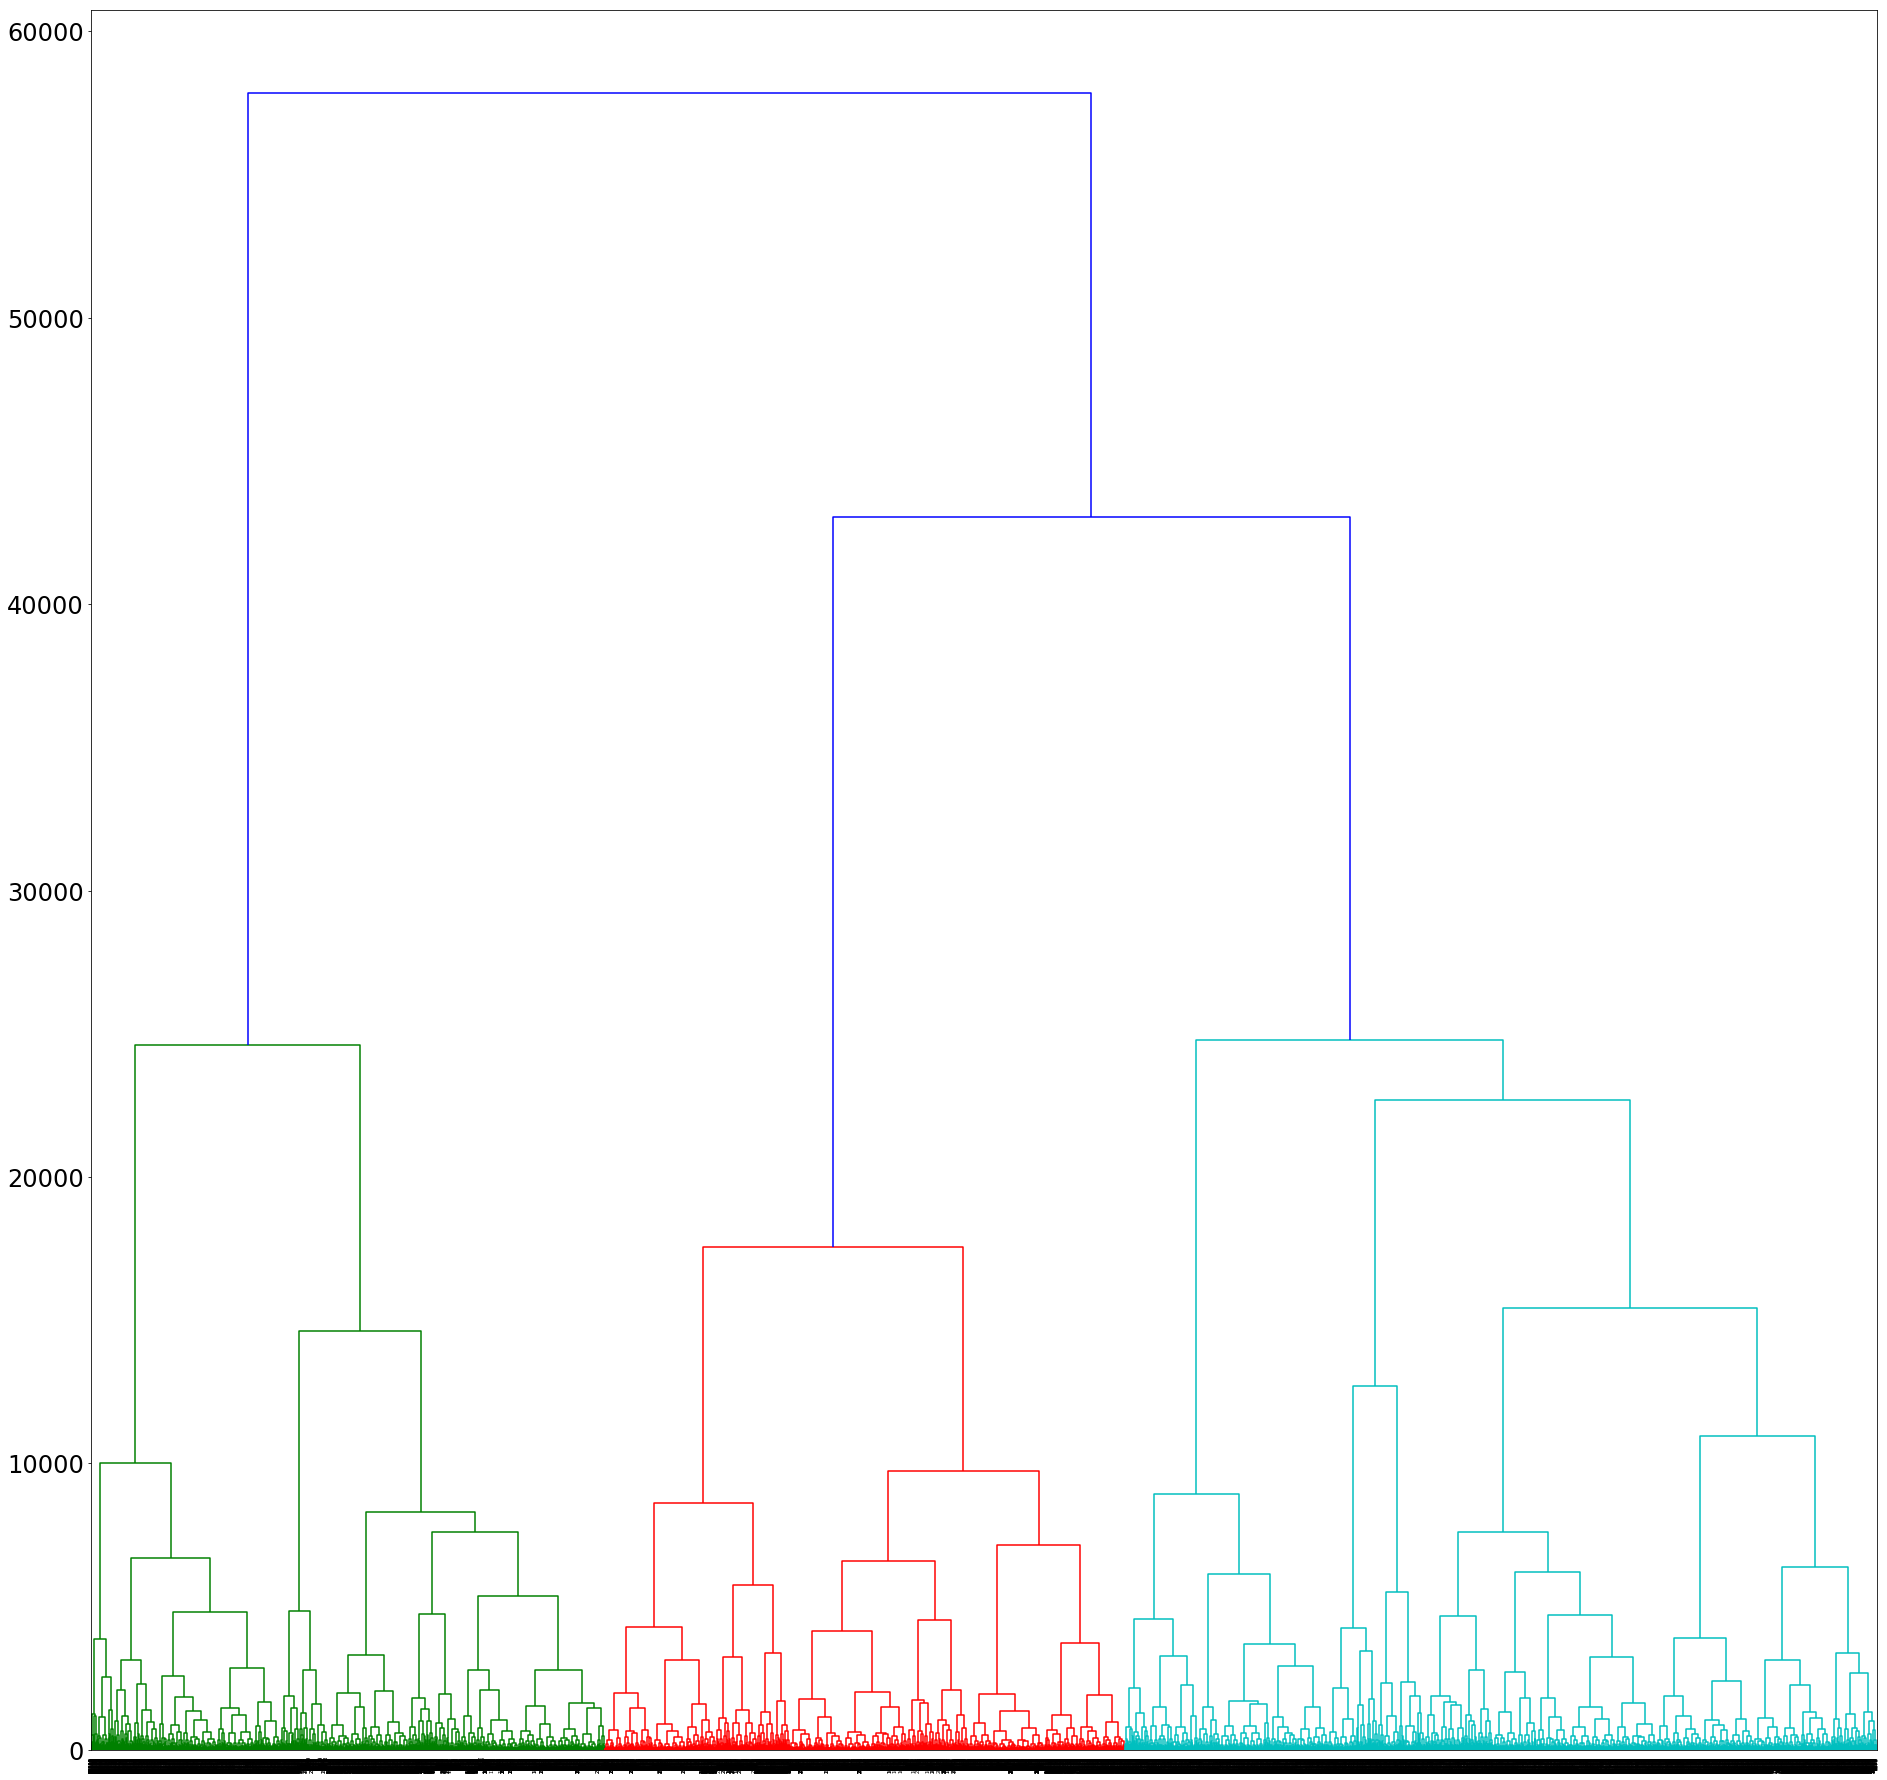

In [59]:
Z = sh.linkage(accidents, 'ward')

mp.figure(figsize=(32,32))
mp.xticks(fontsize=24)
mp.yticks(fontsize=24)

sh.dendrogram(Z)

mp.show()

### Choosing K

In [47]:
k = 3

cut = sh.cut_tree(Z, n_clusters=k)

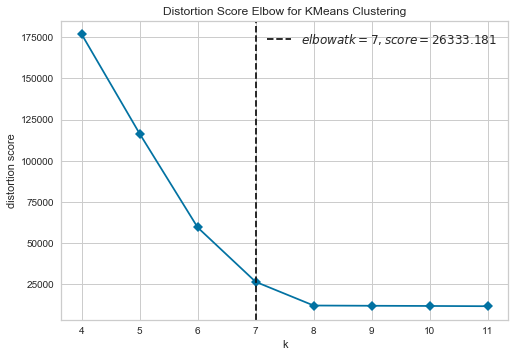

In [87]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, metric='distortion', k=(4,12), timings=False, dpi=900, figsize = (8,8), ylabel='Distortion')
mp.xlabel("k")
mp.ylabel('DDD')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show('image.png', dpi=900, ylabel='Distortion')        # Finalize and render the figure

### Assign cluster to each sample as a label

In [48]:
labels = list([i[0] for i in cut])
labeled_accidents = pd.DataFrame(accidents, columns=accidents_columns)
labeled_accidents['label'] = labels

## Interpreting Netflix Content

In [49]:
# Select which cluster to interpret
cluster = 0

X = labeled_accidents.drop('label', axis=1)
y = [1 if i==cluster else 0 for i in labeled_accidents['label']]

In [50]:
train_X, test_X, train_y, test_y = ms.train_test_split(X, y)

In [51]:
model = st.DecisionTreeClassifier()

# Hyperparameters
params = {
        'max_depth': [1, 2, 3, 4],
        'criterion': ['gini'],
        'min_samples_leaf': [5, 10, 25],
        'class_weight': ['balanced'],
        'ccp_alpha': [0.1, 0.01]
        }

# Grid Search
grid = ms.GridSearchCV(model, params)

# Model Fit
model = grid.fit(train_X, train_y)
model = model.best_estimator_

In [52]:
predictions_train = model.predict_proba(train_X)[:, 1]
predictions_test = model.predict_proba(test_X)[:, 1]
print('In Sample AUC:', sm.roc_auc_score(train_y, predictions_train))
print('Out of Sample AUC: ', sm.roc_auc_score(test_y, predictions_test))

In Sample AUC: 0.9853719710327679
Out of Sample AUC:  0.9847635060080939


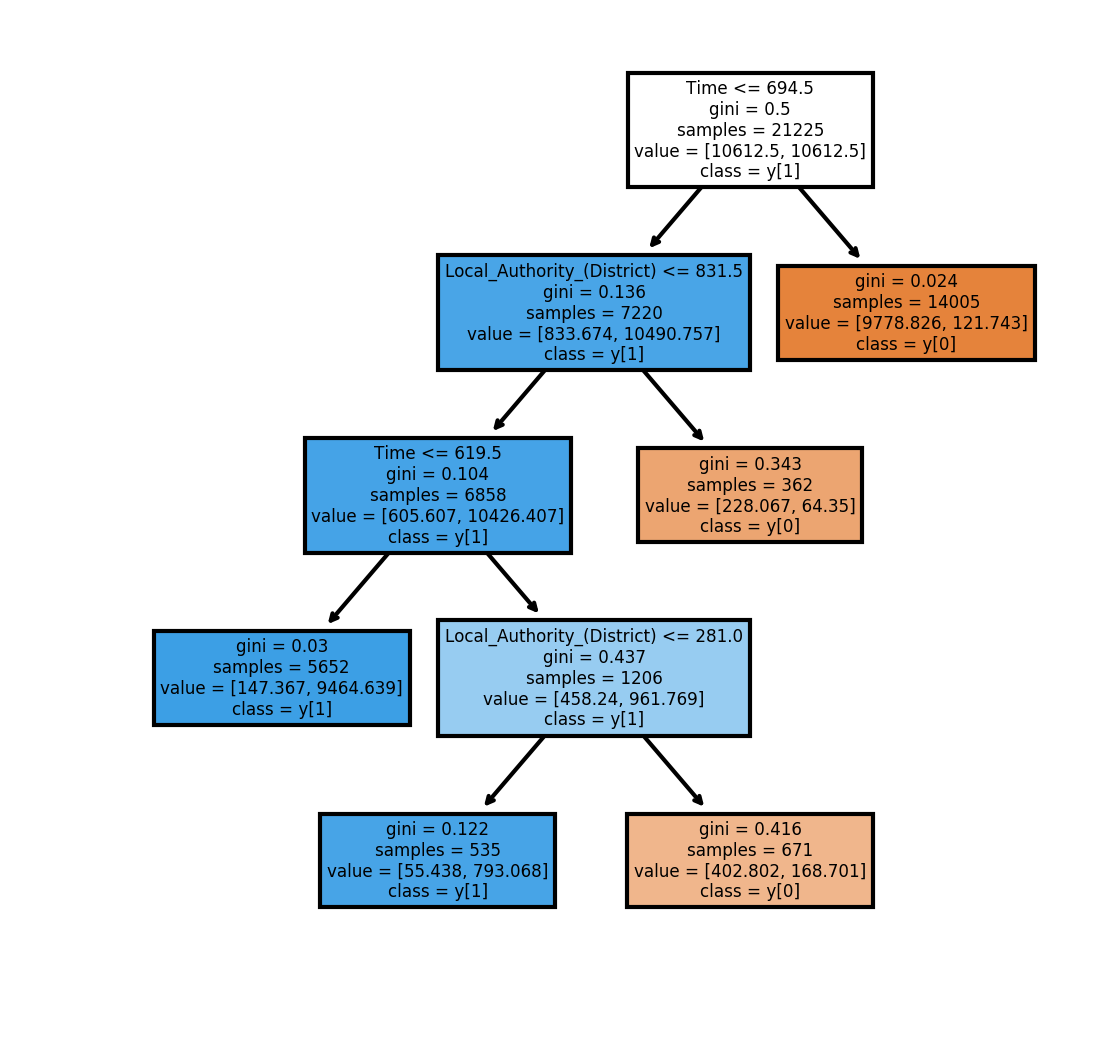

In [53]:
fig, axes = mp.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
st.plot_tree(model,
             feature_names = X.columns,
             filled = True,
             class_names=True);

In [34]:
for l in sorted(labeled_netflix['label'].unique()):
    ip.display(labeled_netflix[labeled_netflix['label']==l].describe())
    ip.display(labeled_netflix[labeled_netflix['label']==l].head())

NameError: name 'labeled_netflix' is not defined